## Defining the question

### Specifying the Data Analytic Question

The aim of this project is to implement a K-nearest neighbour (KNN) classifier on the titanic dataset and optimizing the model

 ### Defining the Metric for Success

Following performance metrics are used to analyze the 
performance of KNN classifier models using different quantities of data to train it.

1. **Precision**: It is used to measures the classifier exactness. It is 
also known as positive predictive value (PPV). 

2. **Recall**: It measures the classifier completeness. It is also known 
as sensitivity or hit rate, or true positive rate (TPR). 
Specificity: It measures the proportion of actual negatives that 
are correctly identified and also called a true negative rate 
(TNR). 

3. **Accuracy**: It measures the fraction of predictions our model got 
right. It can be calculated as the total number of correct 
predictions divided by the total number of test cases. 

4. **F1-Score**: It measures the balance between precision and recall. 


### Understanding context

KNN is one of the simplest algorithms and is widely used in predictive analysis. The ammount of data used to train the dataset affects the accuracy of the classifier. 

The hyperparameters used in the sklearning model of a KNN classifier affects the quality of the predictions. Here I shall aim to explore the performances of the model using different percentages of data in the train and different values of n-neighbours

### Recoriding Experimental design

The following are the steps that were taken in finding the best KNN model to predict the fate of a passenger in the titanic:
1. Importing necessary libraries
2. Loading the dataset using pandas kibrary
3. Checking dataset validity- this was done by 
4. Previewing the datasets- Checking column information, shape, column names, and previewing the first and last five records
5. Tidying the dataset - This included a certain number of steps to remove invalid data and deal with other anomalies. They included:
  - Checking if columns were appropiately named and renaming them appropiately
  - Checking for missing values in the data frame and imputing them appropiately. Cabin column with numerous missing records (over 50%) was drop
  and missing records in age column imputed using the median age of the title in which they belonged. The misssing values in embarked was imputed with the most common record in that attribute
  - The dataset was explored for duplicates and none were found
  - Outliers were explored in the feature age. Some outliers were found though were not dropped or imputed since they fell in a realistic human age bracket.
6. Exploratory data analysis was performed on the dataset which entailed univariate, bivariate analysis and feature selection step to drop irrelevant attributes for subsequent modelling.
7. The dataset was then encoded using a label encoder due to the few number of categorical features in the encoded columns
8. Implementing the solution taken in three steps
  - A knn model created using 80% of titanic data in the train set, and using different (1-75) to find n_neighbour with least error rate 
  - A knn model created using 70% of titanic data in the train set, and using different (1-75) to find n_neighbour with least error rate 
  - A knn model created using 60% of titanic data in the train set, and using different (1-75) to find n_neighbour with least error rate 

The model performances metrics were scored and compared to obtain best performing model

9. The solution was challenged by emplyoing a random forest classifier. The performance metrics of this model was compared to that of the best KNN model
10. A conlusion was arrived at on the best knn model for this task and results of it's comparison with another classifier model
11. Follow questions were addressed

### Data relevance

The following is a description of the attributes in the titatanic dataset:
1. PassengerID- passenger record unique identifier in the dataset 
2. Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
3. survival-  Survival (0 = No; 1 = Yes)
4. Name- Name of passenger
5. Sex- Sex of passenger (M- male, F-Female)
6. Age- Age of passenger
7. Sibsp- Number of Siblings/Spouses Aboard
8. Parch -Number of Parents/Children Aboard
9. Ticket Ticket Number
10. Fare- Passenger Fare (British pound)
11. Cabin- Cabin
12. Embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

**SPECIAL NOTES**
- Pclass is a proxy for socio-economic status (SES)
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
- Age is in Years; Fractional if Age less than One (1)
If the Age is estimated, it is in the form xx.5
- Fare is in Pre-1970 British Pounds ()
Conversion Factors: 1 = 12s = 240d and 1s = 20d

## Importing Libraries

In [93]:
# Importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing matplotlib
import matplotlib.pyplot as plt

# Importing seaborn
import seaborn as sns

# Importing datetime
import datetime

# Importing scipy.stats
import scipy.stats as stats

# Importing scipy
import scipy as sp

# Importing labelencoder from sklearn preprocessing
from sklearn.preprocessing import LabelEncoder

# Importing train test split from sklearn model selection library
from sklearn.model_selection import train_test_split

# importing standardscalar from sklearn preprocessing library
from sklearn.preprocessing import StandardScaler

# Importing KNeighborsClassifier from sklearn neighbors library
from sklearn.neighbors import KNeighborsClassifier

# importing random forest classifier from sklearn
from sklearn.ensemble import RandomForestClassifier

## Loading datasets

In [24]:
# Loading the training dataset
titanic_df = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

## Previewing the datasets

In [25]:
# Previewing the first five records of the titanic dataset
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
# Previewing the last five records of the titanic dataset
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [27]:
# Previewing the shape(rows and columns) of the titanic dataset

rows, columns = titanic_df.shape

# Printing out the number of rows and columns in the titanic dataset
print(f'The titanic dataset has {rows} rows, and {columns} columns')

The titanic dataset has 891 rows, and 12 columns


In [28]:
# Previewing column information in the titanic dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The  dataset has float, integer and object data types

## Tidying the training dataset

### Check for validity

In [29]:
# previewing the column names of the titanic dataset
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

All columns have appropiate datatypes but columns are not appropiately named

In [30]:
# Renaming the columns of the titanic dataset
titanic_df.columns = ['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked']

In [31]:
# Previewing column names after renaming
titanic_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

All columns have been appropiately renamed

### Missing values

In [32]:
# Checking for missing values in the titanic set
titanic_df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Three features had missing values:
  - age            177
  - cabin          687
  - embarked         2

In [33]:
# Checking for the percentage of missing values in the titanic set relative to the entire dataframe
titanic_df.isnull().sum() / len(titanic_df)

passengerid    0.000000
survived       0.000000
pclass         0.000000
name           0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
ticket         0.000000
fare           0.000000
cabin          0.771044
embarked       0.002245
dtype: float64

The cabin feature in the titanic dataframe had over 50% of its records missing. This column shall be dropped

In [34]:
# Dropping the cabin column from the titanic dataset
titanic_df = titanic_df.drop(columns = ['cabin'], axis = 1)

# Previewing the columns in the titanic set after dropping cabin column
titanic_df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

The cabin column has been succesfully dropped. 

The missing age values shall be imputed through using each passengers name title(Mr, Mrs, Dr, etc.) and giving them the median age value for other passengers with the same title

In [35]:
# Creating a title column in the titanic dataset
titanic_df['title'] = titanic_df['name'].str.extract('([A-Za-z]+)\.', expand=True)

In [36]:
# Previewing the titanic dataset for the newly created column
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


Title column in the has been succefully created 

In [37]:
# Previewing unique values and their counts in the Title feature in the titanic dataset
titanic_df['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

Most common titles among the passengers were:
- Mr          517
- Miss        182
- Mrs         125
- Master       40

The were 17 different titles amongst the passengers in the titanic

In [38]:
# Replacing the less common titles with the common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}


titanic_df.replace({'Title': mapping}, inplace=True)

In [39]:
# Imputing missing values of age using the median age of the title groupings
imputed_ages = dict(titanic_df.groupby('title')['age'].median())

# Creating a with ages averaged
titanic_df['av_age'] = titanic_df['title'].apply(lambda x: imputed_ages[x])

#  Replacing all missing values with  values in av_age column
titanic_df['age'].fillna(titanic_df['av_age'], inplace = True)

# Dropping the av_age column since it is no longer needed
titanic_df = titanic_df.drop(columns = ['av_age'], axis = 1)


In [40]:
# Check for remaining null values after imputing null values in age column
titanic_df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       2
title          0
dtype: int64

In [41]:
# Preview records in embarked column with two missing values
titanic_df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [42]:
# Impute both missing records with the most common record in the embarked column ('S')
titanic_df['embarked'].fillna('S', inplace = True)

In [43]:
# Preview dataframe for any more missing values
titanic_df.isnull().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
title          0
dtype: int64

All missing values have been succefully and appropiately dealt with

### Check for duplicates

In [44]:
# Checking for any duplicate records in the titanic dataset
titanic_df.duplicated().sum()

0

The dataset has no duplicate records

### Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


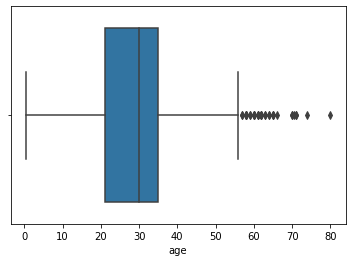

In [45]:
# 1. Outliers
# Checking for outliers in age and fare columns in the titanic dataframe
sns.boxplot(titanic_df['age'])

plt.show()

Outliers were passengers in the titanic with ages over 55 years. However they shall be maintained since all those ages fall within the normal age bracket of most human beings

In [46]:
# Previewing the cleaned dataset
titanic_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


## Feature selection

Some attributes in the dataset add no value to the subsequent predictions to determine whether a passenger survived or not.

The cabin column over 50% of it's records was dropped. Other  features with negligible value to the subsequent analysis are
  - Fare - the fare a passenger paid
  - ticket- the ticket information of a  passenger
  - Name- the name of a passenger
  - Title- the title (Mr or MRs) of a passenger
  - PassengerID- unique identifier of a passenger record is redundant is subsequent analysis

These columns shall all be dropped

In [47]:
# Dropping uneccessary columns(fare, ticket, passengerid, and name) in the titanic dataset
# Since they add no value to the subsequent modeeling steps
titanic_df = titanic_df.drop(columns = ['fare', 'ticket', 'passengerid', 'name', 'title'], axis =1)


## Exploratory data analysis

### Univariate analysis

In [49]:
# The numeric columns in the titanic dataset will be analysed for mean, standard deviation and median values
# Describe titanic dataset
titanic_df[['age', 'sibsp', 'parch']].describe()

,age,sibsp,parch
count,891.000000,891.000000,891.000000
mean,29.390202,0.523008,0.381594
std,13.265322,1.102743,0.806057
min,0.420000,0.000000,0.000000
25%,21.000000,0.000000,0.000000
50%,30.000000,0.000000,0.000000
75%,35.000000,1.000000,0.000000
max,80.000000,8.000000,6.000000


From the results:
Mean:
  - Age - 29.29 years
  - sibsp(Number of Siblings/Spouses Aboard) = 0.523
  - parch(Number of Parents/Children Aboard) = 0.381

Median:
  - age- 30 years
  - sibsp - 0.00
  - parch -0.00

Std:
  - age -13.26
  - sibsp- 1.102
  - parch - 0.806

From these observations, most passengers were around 30 years of age and there was a great disparit amongst the ages of the passengers

Most passengers had no siblings or spouses on board. Furthermore most people were neither parents nor children in the ship. Most passengers in the ship were individuals not families


In [51]:
# Checking the distribution of the age, sibsp, and parch features in the titanic dataset
# Skew
titanic_df[['age', 'sibsp', 'parch']].skew(axis=0, skipna=True, level=None, numeric_only=None)

age      0.436534
sibsp    3.695352
parch    2.749117
dtype: float64

All three attributes(age, sibsp, parch) had a positive skew. They were skewd to the right.

Sibsp had had the largest skew of the three.

In [52]:
# Kurtosis
titanic_df[['age', 'sibsp', 'parch']].kurtosis(axis=0, skipna=True, level=None, numeric_only=None)

age       0.777187
sibsp    17.880420
parch     9.778125
dtype: float64

All three variables had a positive kurtosis. This implies that these variables had more tails than the normal distribution. Sibsp had the highest Kurtosis.

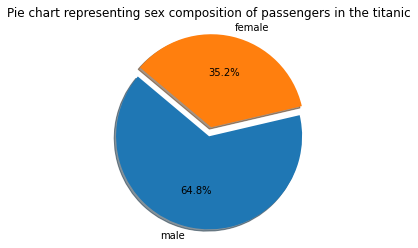

In [53]:
# Pie chart representation of genders aboard the titanic dataset
# Value counts of the sexes in the titanic
sex = titanic_df['sex'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(sex, explode = explode, labels = sex.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Pie chart representing sex composition of passengers in the titanic')

# Show plot
plt.show()


There were more men than women aboard the titanic. 64.8% of the passengers were male, 35.2% were female

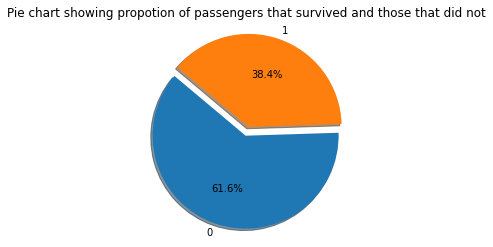

In [54]:
# Pie chart showing the passengers in the titanic that survived and those that did not
# Value counts passengers that survived and those that died in the titanic
survived = titanic_df['survived'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(survived, explode = explode, labels = survived.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Pie chart showing propotion of passengers that survived and those that did not')

# Show plot
plt.show()


- 1-Represents passengers that survived (38.4% of all passengers in the titanic survived)
- 0- Represents passengers that died (61.6% of all passengers perished)

Fewer passengers in the titanic survived the ship sinking compared to those that perished

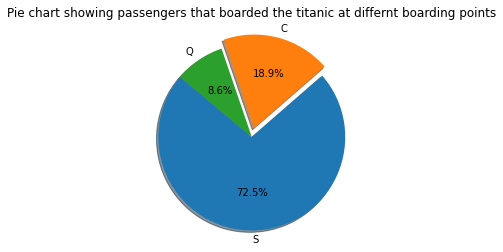

In [55]:
# Pie chart showing the boarding points of the passengers onto the titatnic
# Value counts passengers that boarded the ship in different locations
embarked = titanic_df['embarked'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1, 0)

# Plotting our pie chart
plt.pie(embarked, explode = explode, labels = embarked.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Pie chart showing passengers that boarded the titanic at differnt boarding points')

# Show plot
plt.show()


There were three boarding points that the titanic took in passsengers 
1. S(southhampton)- Most of the passengers (72.5%) in the ship boarded the ship at this location
2. C(Cherbourg) - 18.9% of the passengers aboard the ship boarded the ship at cherbourg
3. Q(queenstown) - 8.6% of the passengers aboard the ship boarded the ship at quenstown

### Encoding

In [56]:
# label encoding the sex and embarked columns since they both have few unique attributes (Sex = 2, embarked = 3)
# Columns for label encoding
categ = ['sex', 'embarked']

# Encode Categorical Columns
le = LabelEncoder()
titanic_df[categ] = titanic_df[categ].apply(le.fit_transform)

In [57]:
# Preview dataset after encoding
titanic_df.head()


,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,1,22.0,1,0,2
1,1,1,0,38.0,1,0,0
2,1,3,0,26.0,0,0,2
3,1,1,0,35.0,1,0,2
4,0,3,1,35.0,0,0,2


### Bivariate analysis

In [58]:
# Finding the correlation of the various attributes in the titanic dataset
corr = titanic_df.corr()

# Correlation dataframe
corr

,survived,pclass,sex,age,sibsp,parch,embarked
survived,1.000000,-0.338481,-0.543351,-0.078816,-0.035322,0.081629,-0.167675
pclass,-0.338481,1.000000,0.131900,-0.354005,0.083081,0.018443,0.162098
sex,-0.543351,0.131900,1.000000,0.104820,-0.114631,-0.245489,0.108262
age,-0.078816,-0.354005,0.104820,1.000000,-0.265602,-0.188122,-0.018319
sibsp,-0.035322,0.083081,-0.114631,-0.265602,1.000000,0.414838,0.068230
parch,0.081629,0.018443,-0.245489,-0.188122,0.414838,1.000000,0.039798
embarked,-0.167675,0.162098,0.108262,-0.018319,0.068230,0.039798,1.000000


Most attributes in the datframe are loosely corelated to thw target variable (survived). Sex had a good correlation to the survival . This indicates that the gender of a passenger most likely influenced the likelyhood one survived or not.

The correlations shall be explored further by analysing the VIF scores of the different attributes

In [59]:
# python suppress exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# VIF scores
pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns=corr.columns)


,survived,pclass,sex,age,sibsp,parch,embarked
survived,1.667,0.526,0.824,0.283,0.162,0.039,0.098
pclass,0.526,1.376,0.078,0.538,0.050,0.037,-0.138
sex,0.824,0.078,1.520,0.007,0.090,0.270,-0.056
age,0.283,0.538,0.007,1.303,0.272,0.102,-0.039
sibsp,0.162,0.050,0.090,0.272,1.283,-0.471,-0.055
parch,0.039,0.037,0.270,0.102,-0.471,1.279,-0.046
embarked,0.098,-0.138,-0.056,-0.039,-0.055,-0.046,1.050


All VIF scores are below 5. There is no multicolinearity issue among the different attributes in the titanic dataset

Dimension reduction techniques shlla not be applied due to the small number of features in the titanic dataset

## Implementing solution

To predict the number of passengers that survived and those that did not, the train dataset shall be split into the a train and test set. The train set shall be be used to train a KNN model using first 80% of data as train 20% as test, the 70% of data as train and 30% as test and finally 60% of data as train and 40% as test

The model shall be optimized and used to predict the test dataset that had no information whether a passenger survived or did not.

### KNN Model 1 (80% train, 20% test)

In [62]:
# Splitting the titanic dataframe to get the target variables and the feature variables
# Feature variables
X = titanic_df.drop(columns = ['survived'], axis =1)

# Target varibale
y = titanic_df['survived']

In [63]:
# Splitting the target and feature variables  to get 80% of the data used in training the 
# Model and 20% of the data to tests the model performance

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [64]:
# Feature scaling
# The feature variables are scaled to ensure that they are all uniformly evaluated

# Specifying the standard scalar
scaler = StandardScaler()

# Fitting the X train data to the scaler
scaler.fit(X_train)


StandardScaler()

In [65]:
# Scaler transformation of the x train data
X_train = scaler.transform(X_train)

# Scaler transformation  of th x_test data
X_test = scaler.transform(X_test)

In [66]:
# Finding optimum n_neighbours in a range from (1-75) n_neighbours
# This shall be done by estimiating the error rate for the different n_neighbours

# Defining empty error rate list
error_rate = []

# Finding error rates for the different values of n_neighbours
for i in range(1,75):
  knn1 = KNeighborsClassifier(n_neighbors=i)
  knn1.fit(X_train, y_train)
  pred = knn1.predict(X_test)
  error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'error rate')

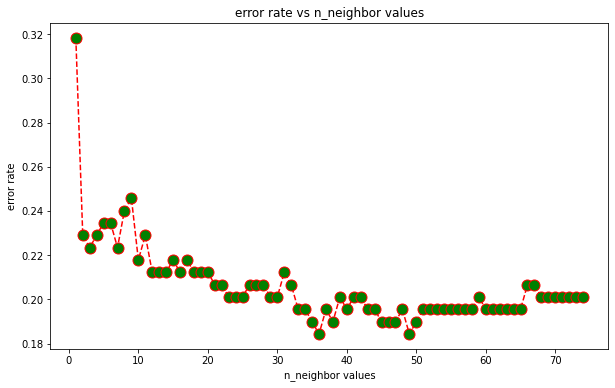

In [67]:
# Plotting the erro rates versus the n_neighbour values to see which n neighbour gets the lowest error rate

# Plotting using matplotlibt error rates vs n_neighbour values
plt.figure(figsize= (10, 6))
plt.plot(range(1, 75), error_rate, color = 'red', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'green', markersize = 11)
plt.title('error rate vs n_neighbor values')
plt.xlabel('n_neighbor values')
plt.ylabel('error rate')


In [68]:
# Calculate optimum n_neighbour value from graph
optimum_neighbour_val = error_rate.index(min(error_rate))+1

# Print minimum error rate and optimum n_neigbour value
print(f'minimum error rate: {min(error_rate)}, optimum n_neighbour value: {optimum_neighbour_val}')

minimum error rate: 0.18435754189944134, optimum n_neighbour value: 36


In [69]:
# Creating the KNN model with; 80% of data as train set
# N_neighbours values = 36

knn1 = KNeighborsClassifier(n_neighbors=optimum_neighbour_val)
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=36)

In [70]:
# Making predictions from the test set
#
pred = knn1.predict(X_test)

In [71]:
# Evaluating the alghorithim
# The metrcs to evaluate the algohrithim will be the confusion matrix, f1_score, recall, and precision

# Importing confusion matrix from sklearn metrics library
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, pred))

[[104  12]
 [ 21  42]]


Confusion matrix interpretation:

1. True positive = 104
2. True Negative = 42
3. False positive = 21
4. False negative = 12

In [72]:
# Importing classification report from sklearn metrics library
from sklearn.metrics import classification_report

# Printing out the classification report of the alghorithim
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       116
           1       0.78      0.67      0.72        63

    accuracy                           0.82       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.82      0.81       179



The model had an accuracy score of 0.82

For predicting passengers that survived and those that did not, it had almost similar precision(0.78 and 0.83 respectively)

The model had a poor recall in the prediction of passengers that survived

In general, from the f1_score, the KNN model using 80% of the data in the train and 20% in the test with 36 n_neighbours performed a lot better predicting passengers that did not survive compared to those that survived

### KNN Model 2 (70% train 30% test)

In [73]:
# Splitting the target and feature variables  to get 70% of the data used in training the 
# Model and 30% of the data to tests the model performance

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [74]:
# Feature scaling
# The feature variables are scaled to ensure that they are all uniformly evaluated

# Specifying the standard scalar
scaler = StandardScaler()

# Fitting the X train data to the scaler
scaler.fit(X_train)


StandardScaler()

In [75]:
# Scaler transformation of the x train data
X_train = scaler.transform(X_train)

# Scaler transformation  of th x_test data
X_test = scaler.transform(X_test)

In [76]:
# Finding optimum n_neighbours in a range from (1-75) n_neighbours
# This shall be done by estimiating the error rate for the different n_neighbours

# Defining empty error rate list
error_rate = []

# Finding error rates for the different values of n_neighbours
for i in range(1,75):
  knn2 = KNeighborsClassifier(n_neighbors=i)
  knn2.fit(X_train, y_train)
  pred = knn2.predict(X_test)
  error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'error rate')

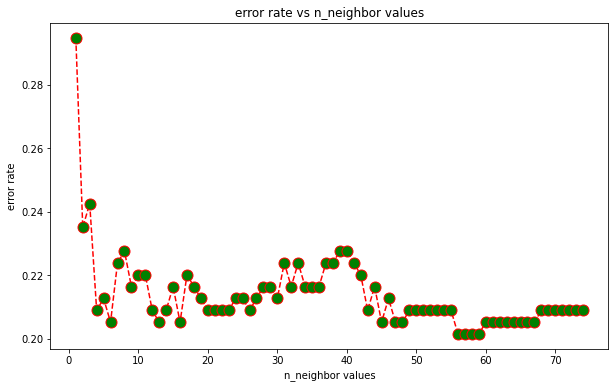

In [77]:
# Plotting the erro rates versus the n_neighbour values to see which n neighbour gets the lowest error rate

# Plotting using matplotlibt error rates vs n_neighbour values
plt.figure(figsize= (10, 6))
plt.plot(range(1, 75), error_rate, color = 'red', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'green', markersize = 11)
plt.title('error rate vs n_neighbor values')
plt.xlabel('n_neighbor values')
plt.ylabel('error rate')


In [78]:
# Calculate optimum n_neighbour value from graph
optimum_neighbour_val = error_rate.index(min(error_rate))+1

# Print minimum error rate and optimum n_neigbour value
print(f'minimum error rate: {min(error_rate)}, optimum n_neighbour value: {optimum_neighbour_val}')

minimum error rate: 0.20149253731343283, optimum n_neighbour value: 56


In [79]:
# Creating the KNN model with; 70% of data as train set
# N_neighbours values = 56

knn2 = KNeighborsClassifier(n_neighbors=optimum_neighbour_val)
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=56)

In [80]:
# Making predictions from the test set
#
pred = knn2.predict(X_test)

In [81]:
# Evaluating the alghorithim
# The metrcs to evaluate the algohrithim will be the confusion matrix, f1_score, recall, and precision

# Importing confusion matrix from sklearn metrics library
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, pred))

[[145  25]
 [ 29  69]]


Confusion matrix interpretation:

1. True positive = 145
2. True Negative = 69
3. False positive = 29
4. False negative = 25

In [82]:
# Importing classification report from sklearn metrics library
from sklearn.metrics import classification_report

# Printing out the classification report of the alghorithim
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       170
           1       0.73      0.70      0.72        98

    accuracy                           0.80       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



The model had an accuracy score of 0.80 lower than the KNN model 1

It performed poorly predicting passengers that survived compared to predicting those that did not

The model had a poor recall in the prediction of passengers that survived

In general, from the f1_score, the KNN model using 70% of the data in the train and 30% in the test with 53 n_neighbours performed a lot better predicting passengers that did not survive compared to those that survived

KNN Model 2 performed worser than KNN Model 1

### KNN Model 3 (60% train 40% test)

In [83]:
# Splitting the target and feature variables  to get 60% of the data used in training the 
# Model and 40% of the data to tests the model performance

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [84]:
# Feature scaling
# The feature variables are scaled to ensure that they are all uniformly evaluated

# Specifying the standard scalar
scaler = StandardScaler()

# Fitting the X train data to the scaler
scaler.fit(X_train)


StandardScaler()

In [85]:
# Scaler transformation of the x train data
X_train = scaler.transform(X_train)

# Scaler transformation  of th x_test data
X_test = scaler.transform(X_test)

In [86]:
# Finding optimum n_neighbours in a range from (1-75) n_neighbours
# This shall be done by estimiating the error rate for the different n_neighbours

# Defining empty error rate list
error_rate = []

# Finding error rates for the different values of n_neighbours
for i in range(1,75):
  knn3 = KNeighborsClassifier(n_neighbors=i)
  knn3.fit(X_train, y_train)
  pred = knn3.predict(X_test)
  error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'error rate')

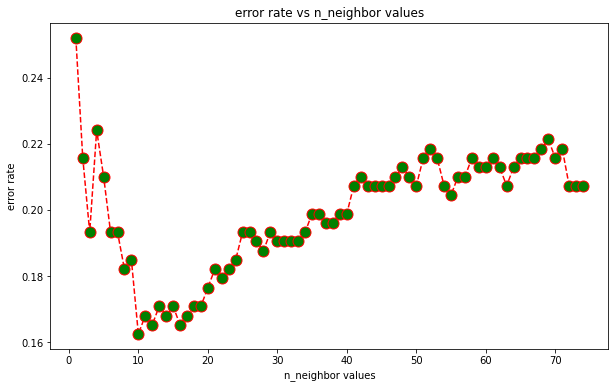

In [87]:
# Plotting the erro rates versus the n_neighbour values to see which n neighbour gets the lowest error rate

# Plotting using matplotlibt error rates vs n_neighbour values
plt.figure(figsize= (10, 6))
plt.plot(range(1, 75), error_rate, color = 'red', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'green', markersize = 11)
plt.title('error rate vs n_neighbor values')
plt.xlabel('n_neighbor values')
plt.ylabel('error rate')


In [88]:
# Calculate optimum n_neighbour value from graph
optimum_neighbour_val = error_rate.index(min(error_rate))+1

# Print minimum error rate and optimum n_neigbour value
print(f'minimum error rate: {min(error_rate)}, optimum n_neighbour value: {optimum_neighbour_val}')

minimum error rate: 0.16246498599439776, optimum n_neighbour value: 10


In [89]:
# Creating the KNN model with; 60% of data as train set
# N_neighbours values = 10

knn3 = KNeighborsClassifier(n_neighbors=optimum_neighbour_val)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
# Making predictions from the test set
#
pred = knn3.predict(X_test)

In [91]:
# Evaluating the alghorithim
# The metrcs to evaluate the algohrithim will be the confusion matrix, f1_score, recall, and precision

# Importing confusion matrix from sklearn metrics library
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, pred))

[[204   7]
 [ 51  95]]


Confusion matrix interpretation:

1. True positive = 204
2. True Negative = 95
3. False positive = 51
4. False negative = 7

In [92]:
# Importing classification report from sklearn metrics library
from sklearn.metrics import classification_report

# Printing out the classification report of the alghorithim
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88       211
           1       0.93      0.65      0.77       146

    accuracy                           0.84       357
   macro avg       0.87      0.81      0.82       357
weighted avg       0.85      0.84      0.83       357



The model had an accuracy score of 0.84 which was higher than the subsequent models(KNN model 1 and KNN model 2)

It performed really well in predicting passengers that survived compare to predicting passengers that did not. However its precision in both instances was compareable or even higher than those obatined in the subsequent two models

The model had a poor recall in the prediction of passengers that survived

In general, from the f1_score, the KNN model using 60% of the data in the train and 40% in the test with 10 n_neighbours performed a lot better predicting passengers that did survived compared to those that perished

KNN Model 3 performed better than KNN model 1 and KNN model 2.

Model 1 using 80% training data and 20% test data had the best performance. This shall be used to make predictions on the test dataset

### KNN Model 4 (20% train 80% test)

In [99]:
# Splitting the target and feature variables  to get 20% of the data used in training the 
# Model and 80% of the data to tests the model performance

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)

In [100]:
# Feature scaling
# The feature variables are scaled to ensure that they are all uniformly evaluated

# Specifying the standard scalar
scaler = StandardScaler()

# Fitting the X train data to the scaler
scaler.fit(X_train)


StandardScaler()

In [101]:
# Scaler transformation of the x train data
X_train = scaler.transform(X_train)

# Scaler transformation  of th x_test data
X_test = scaler.transform(X_test)

In [102]:
# Finding optimum n_neighbours in a range from (1-75) n_neighbours
# This shall be done by estimiating the error rate for the different n_neighbours

# Defining empty error rate list
error_rate = []

# Finding error rates for the different values of n_neighbours
for i in range(1,75):
  knn3 = KNeighborsClassifier(n_neighbors=i)
  knn3.fit(X_train, y_train)
  pred = knn3.predict(X_test)
  error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'error rate')

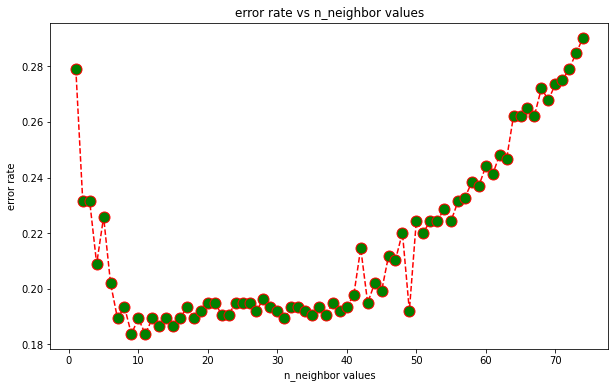

In [103]:
# Plotting the erro rates versus the n_neighbour values to see which n neighbour gets the lowest error rate

# Plotting using matplotlibt error rates vs n_neighbour values
plt.figure(figsize= (10, 6))
plt.plot(range(1, 75), error_rate, color = 'red', linestyle='dashed', 
         marker = 'o', markerfacecolor = 'green', markersize = 11)
plt.title('error rate vs n_neighbor values')
plt.xlabel('n_neighbor values')
plt.ylabel('error rate')


In [104]:
# Calculate optimum n_neighbour value from graph
optimum_neighbour_val = error_rate.index(min(error_rate))+1

# Print minimum error rate and optimum n_neigbour value
print(f'minimum error rate: {min(error_rate)}, optimum n_neighbour value: {optimum_neighbour_val}')

minimum error rate: 0.18373071528751753, optimum n_neighbour value: 9


In [105]:
# Creating the KNN model with; 60% of data as train set
# N_neighbours values = 9

knn3 = KNeighborsClassifier(n_neighbors=optimum_neighbour_val)
knn3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [106]:
# Making predictions from the test set
#
pred = knn3.predict(X_test)

In [107]:
# Evaluating the alghorithim
# The metrcs to evaluate the algohrithim will be the confusion matrix, f1_score, recall, and precision

# Importing confusion matrix from sklearn metrics library
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, pred))

[[383  54]
 [ 77 199]]


Confusion matrix interpretation:

1. True positive = 383
2. True Negative = 199
3. False positive = 77
4. False negative = 54

In [108]:
# Importing classification report from sklearn metrics library
from sklearn.metrics import classification_report

# Printing out the classification report of the alghorithim
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       437
           1       0.79      0.72      0.75       276

    accuracy                           0.82       713
   macro avg       0.81      0.80      0.80       713
weighted avg       0.81      0.82      0.81       713



Reducing the training dataset significantly to 20% of the total data, the accuracy remained similar to the other KNN models using 60%, 70%, 80% of the data 

Had a  accuracy score of 82%

## Challenging Solution

The solution shall be challenged using a random forest classifier with its default hyper parameters. 

The train set shall use up 60% the data in line with the best performing KNN model

In [94]:
# Random forest classifier model
# defining the model with default hyperparameters
forest = RandomForestClassifier()

# Train it on our training set.
model = forest.fit(X_train, y_train)


In [95]:
# Predicting the target variable based on the model wusing the model we've trained
y_pred = model.predict(X_test)

In [96]:
# Evaluating the alghorithim
# The metrcs to evaluate the algohrithim will be the confusion matrix, f1_score, recall, and precision

# Importing confusion matrix from sklearn metrics library
from sklearn.metrics import confusion_matrix

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[181  30]
 [ 45 101]]


Confusion matrix interpretation:

1. True positive = 181
2. True Negative = 101
3. False positive = 45
4. False negative = 30

In [98]:
# Importing classification report from sklearn metrics library
from sklearn.metrics import classification_report

# Printing out the classification report of the alghorithim
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       211
           1       0.77      0.69      0.73       146

    accuracy                           0.79       357
   macro avg       0.79      0.77      0.78       357
weighted avg       0.79      0.79      0.79       357



Random classifier model with default parameters, using 60% of the data in training the model achieved a lower performance metrics than all three KNN models



## Conclusion

In conclusion:
- The ammount of data used to train the model be it 20%, 50%, 80% did not affect the lower or increase the performance metrics of the models significantly. It hence can be concluded that that the ammount of data used to train a KNN model in a dataset with many records does not affect the perfomance metrics of the model

- KNN model is more robust compared to a random forest classifier in the titanic dataset

## Follow up questions

1. Did we have the right data?

Yes, 

for this machine learning problem of comparing KNN models with different ammounts of data to train the model.

2. Do we need other data to to answer our question?
No. 

Titanic dataset was able to full achiev the set objectives

However to compare KNN to other models, different classification problems need to be explored to arrive at a robust conclusion


3. Do we have the right questions?
Yes